In [7]:
from utility import clean_data

import pandas as pd
import numpy as np
from time import time
from matplotlib import pyplot as plt

import tensorflow as tf
import keras
import random

from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

C:\Users\Zhao\Miniconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
name = ['transverse','longitudinal', 'crocodile','normal']

train_data = clean_data(r'train2.csv')
test_data = clean_data(r'test.csv',False)
train = train_data.feature.reshape((-1, 80, 80, 1))

train_x, test_x, train_onehot, test_onehot = train_test_split(train, train_data.onehot, test_size=0.2, random_state=42)


#调整权重w
class_weight = compute_class_weight(class_weight='balanced',
                             classes=np.unique(train_data.label),
                             y=train_data.label)

In [9]:
class Generator():
    def __init__(self, X, y, batch_size=32, aug=False):
        def generator():
            idg = ImageDataGenerator(horizontal_flip=True,
                                     rotation_range=20,
                                     zoom_range=0.2,
                                    )
            while True:
                index = [i for i in range(0, len(X), batch_size)]
                random.shuffle(index)
                for i in index:
                    X_batch = X[i:i+batch_size].copy()
                    y_batch = y[i:i+batch_size].copy() # [x[i:i+batch_size] for x in y]
                    if aug:
                        for j in range(len(X_batch)):
                            X_batch[j] = idg.random_transform(X_batch[j])
                    yield X_batch, y_batch
        self.generator = generator()
        self.steps = len(X) // batch_size + 1
        
gen_train = Generator(train_x, train_onehot, batch_size=128, aug=True)

In [10]:
#DNN model

inputs = Input(shape=(80,80,1))

dnn = Flatten()(inputs)

dnn = Dense(64)(dnn)
dnn = BatchNormalization(axis = -1)(dnn)
dnn = Activation('relu')(dnn)
dnn = Dropout(0.5)(dnn)

dnn = Dense(128)(dnn)
dnn = BatchNormalization(axis = -1)(dnn)
dnn = Activation('relu')(dnn)
dnn = Dropout(0.5)(dnn)

dnn = Dense(64)(dnn)
dnn = BatchNormalization(axis = -1)(dnn)
dnn = Activation('relu')(dnn)
dnn = Dropout(0.5)(dnn)

dnn = Dense(4)(dnn)
dnn = BatchNormalization(axis = -1)(dnn)
dnn = Activation('softmax')(dnn)

outputs = dnn


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# 有数据增强
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model_checkpoint = ModelCheckpoint(filepath='DNN-64-epoch-{epoch:02d}_loss-{loss:.4f}_val_acc-{val_acc:.4f}.h5',
                                   monitor='val_acc',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
y = model.fit_generator(gen_train.generator, 
                        steps_per_epoch=gen_train.steps, 
                        epochs=3000,
                        callbacks=[model_checkpoint],
                        class_weight=class_weight,
                        validation_data=(test_x,test_onehot),
                        verbose=0)


Epoch 00001: val_acc improved from -inf to 0.32311, saving model to DNN-64-epoch-01_loss-1.6034_val_acc-0.3231.h5

Epoch 00002: val_acc did not improve from 0.32311

Epoch 00003: val_acc did not improve from 0.32311

Epoch 00004: val_acc did not improve from 0.32311

Epoch 00005: val_acc did not improve from 0.32311

Epoch 00006: val_acc did not improve from 0.32311

Epoch 00007: val_acc did not improve from 0.32311

Epoch 00008: val_acc did not improve from 0.32311

Epoch 00009: val_acc did not improve from 0.32311

Epoch 00010: val_acc did not improve from 0.32311

Epoch 00011: val_acc did not improve from 0.32311

Epoch 00012: val_acc did not improve from 0.32311

Epoch 00013: val_acc did not improve from 0.32311

Epoch 00014: val_acc did not improve from 0.32311

Epoch 00015: val_acc did not improve from 0.32311

Epoch 00016: val_acc did not improve from 0.32311

Epoch 00017: val_acc improved from 0.32311 to 0.34198, saving model to DNN-64-epoch-17_loss-1.3901_val_acc-0.3420.h5

E


Epoch 00152: val_acc did not improve from 0.75708

Epoch 00153: val_acc did not improve from 0.75708

Epoch 00154: val_acc did not improve from 0.75708

Epoch 00155: val_acc did not improve from 0.75708

Epoch 00156: val_acc did not improve from 0.75708

Epoch 00157: val_acc did not improve from 0.75708

Epoch 00158: val_acc did not improve from 0.75708

Epoch 00159: val_acc did not improve from 0.75708

Epoch 00160: val_acc did not improve from 0.75708

Epoch 00161: val_acc did not improve from 0.75708

Epoch 00162: val_acc did not improve from 0.75708

Epoch 00163: val_acc did not improve from 0.75708

Epoch 00164: val_acc did not improve from 0.75708

Epoch 00165: val_acc did not improve from 0.75708

Epoch 00166: val_acc did not improve from 0.75708

Epoch 00167: val_acc did not improve from 0.75708

Epoch 00168: val_acc did not improve from 0.75708

Epoch 00169: val_acc did not improve from 0.75708

Epoch 00170: val_acc did not improve from 0.75708

Epoch 00171: val_acc did not i


Epoch 00312: val_acc did not improve from 0.79245

Epoch 00313: val_acc did not improve from 0.79245

Epoch 00314: val_acc did not improve from 0.79245

Epoch 00315: val_acc did not improve from 0.79245

Epoch 00316: val_acc did not improve from 0.79245

Epoch 00317: val_acc did not improve from 0.79245

Epoch 00318: val_acc did not improve from 0.79245

Epoch 00319: val_acc did not improve from 0.79245

Epoch 00320: val_acc did not improve from 0.79245

Epoch 00321: val_acc did not improve from 0.79245

Epoch 00322: val_acc did not improve from 0.79245

Epoch 00323: val_acc did not improve from 0.79245

Epoch 00324: val_acc did not improve from 0.79245

Epoch 00325: val_acc did not improve from 0.79245

Epoch 00326: val_acc did not improve from 0.79245

Epoch 00327: val_acc did not improve from 0.79245

Epoch 00328: val_acc did not improve from 0.79245

Epoch 00329: val_acc did not improve from 0.79245

Epoch 00330: val_acc did not improve from 0.79245

Epoch 00331: val_acc did not i


Epoch 00473: val_acc did not improve from 0.79245

Epoch 00474: val_acc did not improve from 0.79245

Epoch 00475: val_acc did not improve from 0.79245

Epoch 00476: val_acc did not improve from 0.79245

Epoch 00477: val_acc did not improve from 0.79245

Epoch 00478: val_acc did not improve from 0.79245

Epoch 00479: val_acc did not improve from 0.79245

Epoch 00480: val_acc did not improve from 0.79245

Epoch 00481: val_acc did not improve from 0.79245

Epoch 00482: val_acc did not improve from 0.79245

Epoch 00483: val_acc did not improve from 0.79245

Epoch 00484: val_acc did not improve from 0.79245

Epoch 00485: val_acc did not improve from 0.79245

Epoch 00486: val_acc did not improve from 0.79245

Epoch 00487: val_acc did not improve from 0.79245

Epoch 00488: val_acc did not improve from 0.79245

Epoch 00489: val_acc did not improve from 0.79245

Epoch 00490: val_acc did not improve from 0.79245

Epoch 00491: val_acc did not improve from 0.79245

Epoch 00492: val_acc did not i


Epoch 00633: val_acc did not improve from 0.79481

Epoch 00634: val_acc did not improve from 0.79481

Epoch 00635: val_acc did not improve from 0.79481

Epoch 00636: val_acc did not improve from 0.79481

Epoch 00637: val_acc did not improve from 0.79481

Epoch 00638: val_acc did not improve from 0.79481

Epoch 00639: val_acc did not improve from 0.79481

Epoch 00640: val_acc did not improve from 0.79481

Epoch 00641: val_acc did not improve from 0.79481

Epoch 00642: val_acc did not improve from 0.79481

Epoch 00643: val_acc did not improve from 0.79481

Epoch 00644: val_acc did not improve from 0.79481

Epoch 00645: val_acc did not improve from 0.79481

Epoch 00646: val_acc did not improve from 0.79481

Epoch 00647: val_acc did not improve from 0.79481

Epoch 00648: val_acc did not improve from 0.79481

Epoch 00649: val_acc did not improve from 0.79481

Epoch 00650: val_acc did not improve from 0.79481

Epoch 00651: val_acc did not improve from 0.79481

Epoch 00652: val_acc did not i


Epoch 00793: val_acc did not improve from 0.80896

Epoch 00794: val_acc did not improve from 0.80896

Epoch 00795: val_acc did not improve from 0.80896

Epoch 00796: val_acc did not improve from 0.80896

Epoch 00797: val_acc did not improve from 0.80896

Epoch 00798: val_acc did not improve from 0.80896

Epoch 00799: val_acc did not improve from 0.80896

Epoch 00800: val_acc did not improve from 0.80896

Epoch 00801: val_acc did not improve from 0.80896

Epoch 00802: val_acc did not improve from 0.80896

Epoch 00803: val_acc did not improve from 0.80896

Epoch 00804: val_acc did not improve from 0.80896

Epoch 00805: val_acc did not improve from 0.80896

Epoch 00806: val_acc did not improve from 0.80896

Epoch 00807: val_acc did not improve from 0.80896

Epoch 00808: val_acc did not improve from 0.80896

Epoch 00809: val_acc did not improve from 0.80896

Epoch 00810: val_acc did not improve from 0.80896

Epoch 00811: val_acc did not improve from 0.80896

Epoch 00812: val_acc did not i


Epoch 00954: val_acc did not improve from 0.80896

Epoch 00955: val_acc did not improve from 0.80896

Epoch 00956: val_acc did not improve from 0.80896

Epoch 00957: val_acc did not improve from 0.80896

Epoch 00958: val_acc did not improve from 0.80896

Epoch 00959: val_acc did not improve from 0.80896

Epoch 00960: val_acc did not improve from 0.80896

Epoch 00961: val_acc did not improve from 0.80896

Epoch 00962: val_acc did not improve from 0.80896

Epoch 00963: val_acc did not improve from 0.80896

Epoch 00964: val_acc did not improve from 0.80896

Epoch 00965: val_acc did not improve from 0.80896

Epoch 00966: val_acc did not improve from 0.80896

Epoch 00967: val_acc did not improve from 0.80896

Epoch 00968: val_acc did not improve from 0.80896

Epoch 00969: val_acc did not improve from 0.80896

Epoch 00970: val_acc did not improve from 0.80896

Epoch 00971: val_acc did not improve from 0.80896

Epoch 00972: val_acc did not improve from 0.80896

Epoch 00973: val_acc did not i


Epoch 01114: val_acc did not improve from 0.83962

Epoch 01115: val_acc did not improve from 0.83962

Epoch 01116: val_acc did not improve from 0.83962

Epoch 01117: val_acc did not improve from 0.83962

Epoch 01118: val_acc did not improve from 0.83962

Epoch 01119: val_acc did not improve from 0.83962

Epoch 01120: val_acc did not improve from 0.83962

Epoch 01121: val_acc did not improve from 0.83962

Epoch 01122: val_acc did not improve from 0.83962

Epoch 01123: val_acc did not improve from 0.83962

Epoch 01124: val_acc did not improve from 0.83962

Epoch 01125: val_acc did not improve from 0.83962

Epoch 01126: val_acc did not improve from 0.83962

Epoch 01127: val_acc did not improve from 0.83962

Epoch 01128: val_acc did not improve from 0.83962

Epoch 01129: val_acc did not improve from 0.83962

Epoch 01130: val_acc did not improve from 0.83962

Epoch 01131: val_acc did not improve from 0.83962

Epoch 01132: val_acc did not improve from 0.83962

Epoch 01133: val_acc did not i


Epoch 01275: val_acc did not improve from 0.83962

Epoch 01276: val_acc did not improve from 0.83962

Epoch 01277: val_acc did not improve from 0.83962

Epoch 01278: val_acc did not improve from 0.83962

Epoch 01279: val_acc did not improve from 0.83962

Epoch 01280: val_acc did not improve from 0.83962

Epoch 01281: val_acc did not improve from 0.83962

Epoch 01282: val_acc did not improve from 0.83962

Epoch 01283: val_acc did not improve from 0.83962

Epoch 01284: val_acc did not improve from 0.83962

Epoch 01285: val_acc did not improve from 0.83962

Epoch 01286: val_acc did not improve from 0.83962

Epoch 01287: val_acc did not improve from 0.83962

Epoch 01288: val_acc did not improve from 0.83962

Epoch 01289: val_acc did not improve from 0.83962

Epoch 01290: val_acc did not improve from 0.83962

Epoch 01291: val_acc did not improve from 0.83962

Epoch 01292: val_acc did not improve from 0.83962

Epoch 01293: val_acc did not improve from 0.83962

Epoch 01294: val_acc did not i


Epoch 01436: val_acc did not improve from 0.83962

Epoch 01437: val_acc did not improve from 0.83962

Epoch 01438: val_acc did not improve from 0.83962

Epoch 01439: val_acc did not improve from 0.83962

Epoch 01440: val_acc did not improve from 0.83962

Epoch 01441: val_acc did not improve from 0.83962

Epoch 01442: val_acc did not improve from 0.83962

Epoch 01443: val_acc did not improve from 0.83962

Epoch 01444: val_acc did not improve from 0.83962

Epoch 01445: val_acc did not improve from 0.83962

Epoch 01446: val_acc did not improve from 0.83962

Epoch 01447: val_acc did not improve from 0.83962

Epoch 01448: val_acc did not improve from 0.83962

Epoch 01449: val_acc did not improve from 0.83962

Epoch 01450: val_acc did not improve from 0.83962

Epoch 01451: val_acc did not improve from 0.83962

Epoch 01452: val_acc did not improve from 0.83962

Epoch 01453: val_acc did not improve from 0.83962

Epoch 01454: val_acc did not improve from 0.83962

Epoch 01455: val_acc did not i


Epoch 01597: val_acc did not improve from 0.83962

Epoch 01598: val_acc did not improve from 0.83962

Epoch 01599: val_acc did not improve from 0.83962

Epoch 01600: val_acc did not improve from 0.83962

Epoch 01601: val_acc did not improve from 0.83962

Epoch 01602: val_acc did not improve from 0.83962

Epoch 01603: val_acc did not improve from 0.83962

Epoch 01604: val_acc did not improve from 0.83962

Epoch 01605: val_acc did not improve from 0.83962

Epoch 01606: val_acc did not improve from 0.83962

Epoch 01607: val_acc did not improve from 0.83962

Epoch 01608: val_acc did not improve from 0.83962

Epoch 01609: val_acc did not improve from 0.83962

Epoch 01610: val_acc did not improve from 0.83962

Epoch 01611: val_acc did not improve from 0.83962

Epoch 01612: val_acc did not improve from 0.83962

Epoch 01613: val_acc did not improve from 0.83962

Epoch 01614: val_acc did not improve from 0.83962

Epoch 01615: val_acc did not improve from 0.83962

Epoch 01616: val_acc did not i


Epoch 01758: val_acc did not improve from 0.83962

Epoch 01759: val_acc did not improve from 0.83962

Epoch 01760: val_acc did not improve from 0.83962

Epoch 01761: val_acc did not improve from 0.83962

Epoch 01762: val_acc did not improve from 0.83962

Epoch 01763: val_acc did not improve from 0.83962

Epoch 01764: val_acc did not improve from 0.83962

Epoch 01765: val_acc did not improve from 0.83962

Epoch 01766: val_acc did not improve from 0.83962

Epoch 01767: val_acc did not improve from 0.83962

Epoch 01768: val_acc did not improve from 0.83962

Epoch 01769: val_acc did not improve from 0.83962

Epoch 01770: val_acc did not improve from 0.83962

Epoch 01771: val_acc did not improve from 0.83962

Epoch 01772: val_acc did not improve from 0.83962

Epoch 01773: val_acc did not improve from 0.83962

Epoch 01774: val_acc did not improve from 0.83962

Epoch 01775: val_acc did not improve from 0.83962

Epoch 01776: val_acc did not improve from 0.83962

Epoch 01777: val_acc did not i


Epoch 01919: val_acc did not improve from 0.83962

Epoch 01920: val_acc did not improve from 0.83962

Epoch 01921: val_acc did not improve from 0.83962

Epoch 01922: val_acc did not improve from 0.83962

Epoch 01923: val_acc did not improve from 0.83962

Epoch 01924: val_acc did not improve from 0.83962

Epoch 01925: val_acc did not improve from 0.83962

Epoch 01926: val_acc did not improve from 0.83962

Epoch 01927: val_acc did not improve from 0.83962

Epoch 01928: val_acc did not improve from 0.83962

Epoch 01929: val_acc did not improve from 0.83962

Epoch 01930: val_acc did not improve from 0.83962

Epoch 01931: val_acc did not improve from 0.83962

Epoch 01932: val_acc did not improve from 0.83962

Epoch 01933: val_acc did not improve from 0.83962

Epoch 01934: val_acc did not improve from 0.83962

Epoch 01935: val_acc did not improve from 0.83962

Epoch 01936: val_acc did not improve from 0.83962

Epoch 01937: val_acc did not improve from 0.83962

Epoch 01938: val_acc did not i


Epoch 02079: val_acc did not improve from 0.86321

Epoch 02080: val_acc did not improve from 0.86321

Epoch 02081: val_acc did not improve from 0.86321

Epoch 02082: val_acc did not improve from 0.86321

Epoch 02083: val_acc did not improve from 0.86321

Epoch 02084: val_acc did not improve from 0.86321

Epoch 02085: val_acc did not improve from 0.86321

Epoch 02086: val_acc did not improve from 0.86321

Epoch 02087: val_acc did not improve from 0.86321

Epoch 02088: val_acc did not improve from 0.86321

Epoch 02089: val_acc did not improve from 0.86321

Epoch 02090: val_acc did not improve from 0.86321

Epoch 02091: val_acc did not improve from 0.86321

Epoch 02092: val_acc did not improve from 0.86321

Epoch 02093: val_acc did not improve from 0.86321

Epoch 02094: val_acc did not improve from 0.86321

Epoch 02095: val_acc did not improve from 0.86321

Epoch 02096: val_acc did not improve from 0.86321

Epoch 02097: val_acc did not improve from 0.86321

Epoch 02098: val_acc did not i


Epoch 02240: val_acc did not improve from 0.86321

Epoch 02241: val_acc did not improve from 0.86321

Epoch 02242: val_acc did not improve from 0.86321

Epoch 02243: val_acc did not improve from 0.86321

Epoch 02244: val_acc did not improve from 0.86321

Epoch 02245: val_acc did not improve from 0.86321

Epoch 02246: val_acc did not improve from 0.86321

Epoch 02247: val_acc did not improve from 0.86321

Epoch 02248: val_acc did not improve from 0.86321

Epoch 02249: val_acc did not improve from 0.86321

Epoch 02250: val_acc did not improve from 0.86321

Epoch 02251: val_acc did not improve from 0.86321

Epoch 02252: val_acc did not improve from 0.86321

Epoch 02253: val_acc did not improve from 0.86321

Epoch 02254: val_acc did not improve from 0.86321

Epoch 02255: val_acc did not improve from 0.86321

Epoch 02256: val_acc did not improve from 0.86321

Epoch 02257: val_acc did not improve from 0.86321

Epoch 02258: val_acc did not improve from 0.86321

Epoch 02259: val_acc did not i


Epoch 02401: val_acc did not improve from 0.86321

Epoch 02402: val_acc did not improve from 0.86321

Epoch 02403: val_acc did not improve from 0.86321

Epoch 02404: val_acc did not improve from 0.86321

Epoch 02405: val_acc did not improve from 0.86321

Epoch 02406: val_acc did not improve from 0.86321

Epoch 02407: val_acc did not improve from 0.86321

Epoch 02408: val_acc did not improve from 0.86321

Epoch 02409: val_acc did not improve from 0.86321

Epoch 02410: val_acc did not improve from 0.86321

Epoch 02411: val_acc did not improve from 0.86321

Epoch 02412: val_acc did not improve from 0.86321

Epoch 02413: val_acc did not improve from 0.86321

Epoch 02414: val_acc did not improve from 0.86321

Epoch 02415: val_acc did not improve from 0.86321

Epoch 02416: val_acc did not improve from 0.86321

Epoch 02417: val_acc did not improve from 0.86321

Epoch 02418: val_acc did not improve from 0.86321

Epoch 02419: val_acc did not improve from 0.86321

Epoch 02420: val_acc did not i


Epoch 02562: val_acc did not improve from 0.86321

Epoch 02563: val_acc did not improve from 0.86321

Epoch 02564: val_acc did not improve from 0.86321

Epoch 02565: val_acc did not improve from 0.86321

Epoch 02566: val_acc did not improve from 0.86321

Epoch 02567: val_acc did not improve from 0.86321

Epoch 02568: val_acc did not improve from 0.86321

Epoch 02569: val_acc did not improve from 0.86321

Epoch 02570: val_acc did not improve from 0.86321

Epoch 02571: val_acc did not improve from 0.86321

Epoch 02572: val_acc did not improve from 0.86321

Epoch 02573: val_acc did not improve from 0.86321

Epoch 02574: val_acc did not improve from 0.86321

Epoch 02575: val_acc did not improve from 0.86321

Epoch 02576: val_acc did not improve from 0.86321

Epoch 02577: val_acc did not improve from 0.86321

Epoch 02578: val_acc did not improve from 0.86321

Epoch 02579: val_acc did not improve from 0.86321

Epoch 02580: val_acc did not improve from 0.86321

Epoch 02581: val_acc did not i


Epoch 02723: val_acc did not improve from 0.86321

Epoch 02724: val_acc did not improve from 0.86321

Epoch 02725: val_acc did not improve from 0.86321

Epoch 02726: val_acc did not improve from 0.86321

Epoch 02727: val_acc did not improve from 0.86321

Epoch 02728: val_acc did not improve from 0.86321

Epoch 02729: val_acc did not improve from 0.86321

Epoch 02730: val_acc did not improve from 0.86321

Epoch 02731: val_acc did not improve from 0.86321

Epoch 02732: val_acc did not improve from 0.86321

Epoch 02733: val_acc did not improve from 0.86321

Epoch 02734: val_acc did not improve from 0.86321

Epoch 02735: val_acc did not improve from 0.86321

Epoch 02736: val_acc did not improve from 0.86321

Epoch 02737: val_acc did not improve from 0.86321

Epoch 02738: val_acc did not improve from 0.86321

Epoch 02739: val_acc did not improve from 0.86321

Epoch 02740: val_acc did not improve from 0.86321

Epoch 02741: val_acc did not improve from 0.86321

Epoch 02742: val_acc did not i


Epoch 02884: val_acc did not improve from 0.86321

Epoch 02885: val_acc did not improve from 0.86321

Epoch 02886: val_acc did not improve from 0.86321

Epoch 02887: val_acc did not improve from 0.86321

Epoch 02888: val_acc did not improve from 0.86321

Epoch 02889: val_acc did not improve from 0.86321

Epoch 02890: val_acc did not improve from 0.86321

Epoch 02891: val_acc did not improve from 0.86321

Epoch 02892: val_acc did not improve from 0.86321

Epoch 02893: val_acc did not improve from 0.86321

Epoch 02894: val_acc did not improve from 0.86321

Epoch 02895: val_acc did not improve from 0.86321

Epoch 02896: val_acc did not improve from 0.86321

Epoch 02897: val_acc did not improve from 0.86321

Epoch 02898: val_acc did not improve from 0.86321

Epoch 02899: val_acc did not improve from 0.86321

Epoch 02900: val_acc did not improve from 0.86321

Epoch 02901: val_acc did not improve from 0.86321

Epoch 02902: val_acc did not improve from 0.86321

Epoch 02903: val_acc did not i

In [13]:
dst = y.history

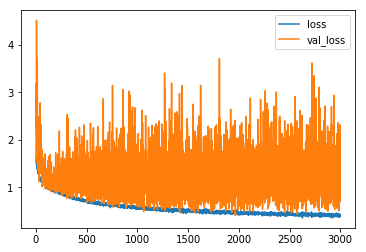

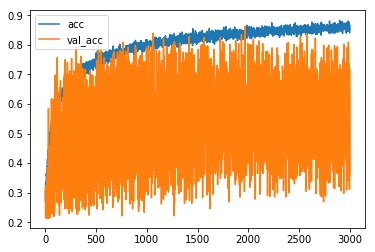

In [14]:
def plot_result_acc(r):
    
    #绘制折线图 accuracies
    plt.plot(r['acc'], label='acc')
    plt.plot(r['val_acc'], label='val_acc')
    plt.legend()
    plt.savefig("dnn_acc.png")
    plt.show()
    
def plot_result_loss(r):
    #绘制折线图 loss
    plt.plot(r['loss'],label='loss')
    plt.plot(r['val_loss'], label='val_loss')
    plt.legend()
    plt.savefig("dnn_loss.png")
    plt.show()

plot_result_loss(dst)   
plot_result_acc(dst)